In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

RANDOM_STATE = 42

X = np.load('NonNumeric_feature_dataset/nonnumeric6_labelen_train.npy')
# X = np.delete(X, 1, axis=1)
y = np.load('Numeric_feature_dataset/target_train.npy').reshape(-1, )
# X = np.delete(X, 2, axis=1) # 去掉路名
# X = np.delete(X, 1, axis=1) # 去掉鄉鎮市區
X = X[:, 0].reshape(-1, 1) # 只用縣市
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

rfg = RandomForestRegressor(n_estimators=500, verbose=1, max_depth=6).fit(X_train, y_train)
train_pred = rfg.predict(X_train)
print(mean_absolute_percentage_error(y_train, train_pred)*100)
test_pred = rfg.predict(X_test)
print(mean_absolute_percentage_error(y_test, test_pred)*100)
print(rfg.score(X_train, y_train))
print(rfg.score(X_test, y_test))

(11751, 1)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


42.95059467276738
43.42740030870523
0.025515920267689673
-0.0049926785540810315


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


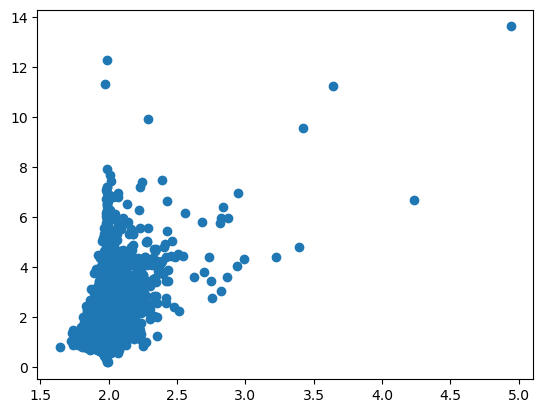

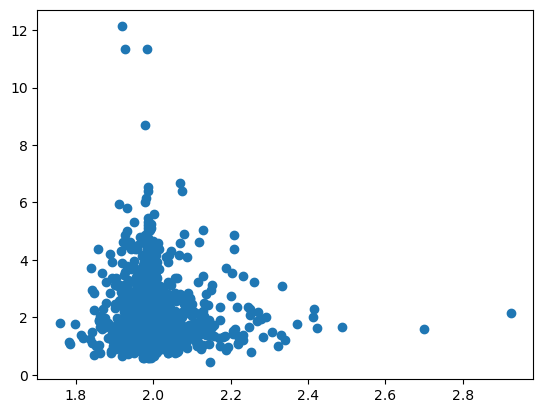

In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_pred, y_train, 'o')
plt.show()

plt.figure()
plt.plot(test_pred, y_test, 'o')
plt.show()